In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('holdout_test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [7]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 2. EDA

### 2.1. Continuous Variables

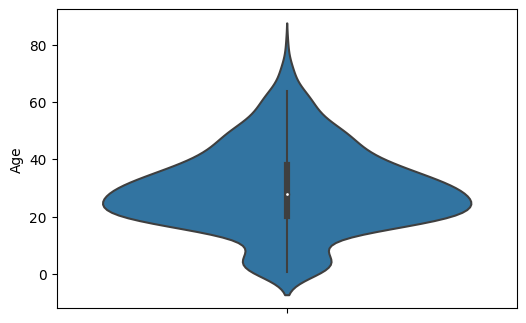

In [8]:
# Age
plt.rcParams['figure.dpi'] = 99
sns.violinplot(y='Age', data=data)

Right-skewed, almost Gaussian.

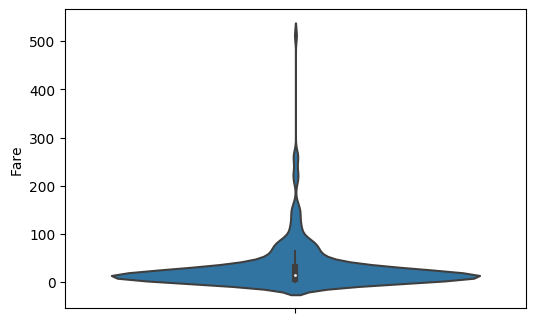

In [9]:
# Fare
sns.violinplot(y='Fare', data=data)

Fat tail and skew observed.

### 2.2. Categorical Variables

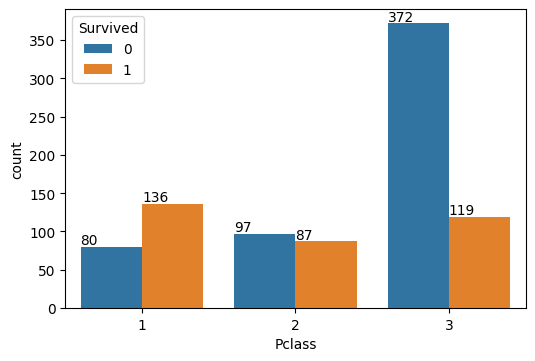

In [10]:
# Pclass
pclass_plot = sns.countplot(x='Pclass', hue='Survived', data=data)
for p in pclass_plot.patches:
    pclass_plot.annotate(p.get_height(), xy=(p.get_x(), p.get_height()+3))

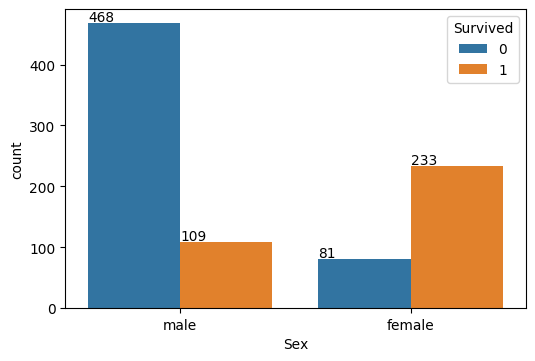

In [11]:
# Sex
sex_plot = sns.countplot(x='Sex', hue='Survived', data=data)
for p in sex_plot.patches:
    sex_plot.annotate(p.get_height(), xy=(p.get_x(), p.get_height()+3))

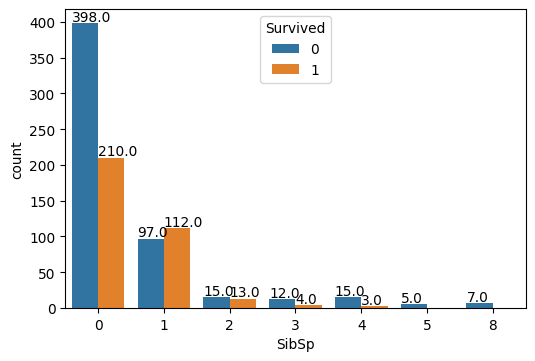

In [12]:
# SibSp
sibsp_plot = sns.countplot(x='SibSp', hue='Survived', data=data)
for p in sibsp_plot.patches:
    sibsp_plot.annotate(p.get_height(), xy=(p.get_x(), p.get_height()+3))

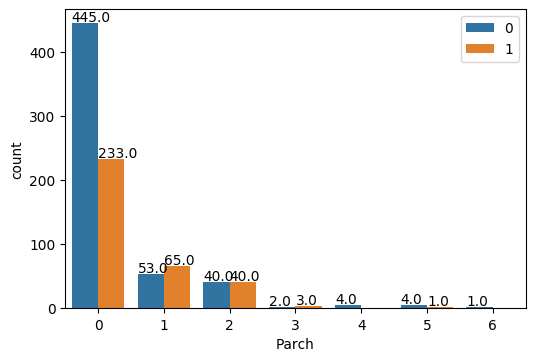

In [13]:
# Parch
parch_plot = sns.countplot(x='Parch', hue='Survived', data=data)
parch_plot.legend(loc='upper right')
for p in parch_plot.patches:
    parch_plot.annotate(p.get_height(), xy=(p.get_x(), p.get_height()+3))

In [14]:
# Ticket
data.Ticket.value_counts(dropna=False)

CA. 2343              7
1601                  7
347082                7
3101295               6
CA 2144               6
                     ..
13214                 1
PC 17603              1
330909                1
113773                1
SOTON/O.Q. 3101310    1
Name: Ticket, Length: 681, dtype: int64

In [15]:
data.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Due to the high number of unique items, this column will be dropped. Also, ticket number probably is not informative of a passenger's eventual survival.

In [16]:
# Cabin
data.Cabin.value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
C50              1
B102             1
D46              1
A20              1
D37              1
Name: Cabin, Length: 148, dtype: int64

To be dropped due to high proportion of missing values and lack of information to infer those missing values. Also, research shows that *Cabin* is related to *Pclass*, which is kept as a predictor. Hence, *Cabin* can be confidently removed.

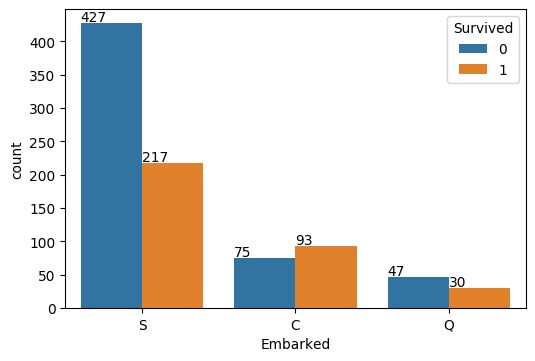

In [17]:
# Embarked
embarked_plot = sns.countplot(x='Embarked', hue='Survived', data=data)
for p in embarked_plot.patches:
    embarked_plot.annotate(p.get_height(), xy=(p.get_x(), p.get_height()+3))

# 3. Impute Missing Data and Drop Columns

In [18]:
# Refresher
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.1.1. Embarked

In [19]:
data.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [20]:
data.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

The port of embarkation can hardly be informative; but in order to keep the two rows of almost perfect data, the missing values will be imputed with the mode.

In [21]:
data.Embarked.fillna("S", inplace=True)

In [22]:
data.Embarked.describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

### 3.1.2. Age

Presumably, age is predictive of a passenger's survival; high or low age may result in death. To impute age, it may be useful to first see if age has any relationship with some of the other predictors.

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

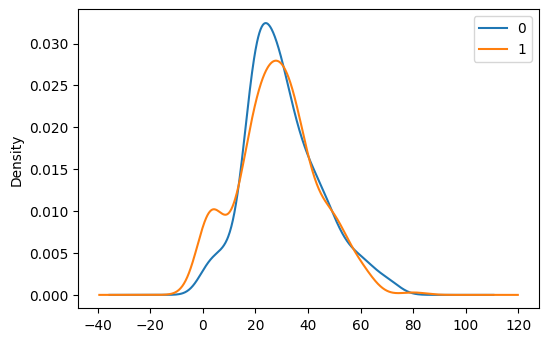

In [23]:
data.groupby('Survived')['Age'].plot.kde(legend=True)

/Users/mark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/mark/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Density')

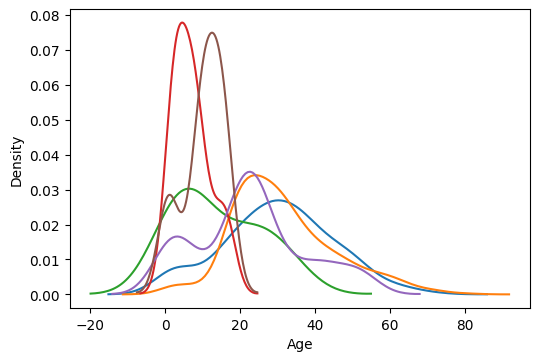

In [24]:
SibSp = data.SibSp.unique().tolist()

for x in SibSp:
    try:
        subset = data[data['SibSp'] == x]
        sns.distplot(subset['Age'], hist = False, kde = True)
    except:
        continue

plt.ylabel('Density')

/Users/mark/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

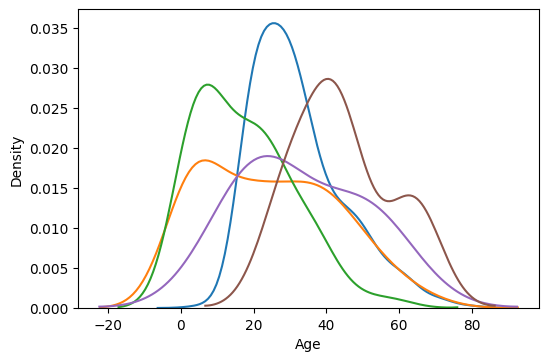

In [25]:
Parch = data.Parch.unique().tolist()

for x in Parch:
    try:
        subset = data[data['Parch'] == x]
        sns.distplot(subset['Age'], hist = False, kde = True)
    except:
        continue

plt.ylabel('Density')

From the above, it does seem that age has different distributions with regards to different predictors, especially *Survived* and *SibSp*.

In [26]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [27]:
data.groupby(['FamilySize'])['Age'].median()

FamilySize
1     29.5
2     29.0
3     27.0
4     23.0
5     18.0
6     12.0
7      9.0
8     12.5
11     NaN
Name: Age, dtype: float64

In [28]:
data.Age = data.groupby(['FamilySize'])['Age'].apply(lambda x: x.fillna(x.median()))

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          884 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [30]:
data.Age = data.Age.fillna(data.Age.median())

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


As seen above, some values are still missing, presumably because there isn't enough data after groupby. Impute the rest with the median of groupby Survived.

### 3.2. Drop

In [32]:
data = data.drop(['Cabin', 'Ticket'], axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


# 4. Feature Engineering

### 4.1. Relatives

The number of siblings/spouses and parents/children can be added to create a new column, indicating the total number of relatives onboard.

In [34]:
# data['Relatives'] = data['Parch'] + data['SibSp']
# data.info()

### 4.2. Is Alone

The predictors below are in fact categorical as opposed to continuous.

In [35]:
data['IsAlone'] = 1 
data['IsAlone'].loc[data['FamilySize'] > 1] = 0 

/Users/mark/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 4.3. Title

In [36]:
data['Title'] = data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

### 4.4. Last Name

In [37]:
data['LastName'] = data.Name.str.split(',').str[0]

### 4.5. Is Woman or Boy

In [38]:
data['IsWomanOrBoy'] = ((data.Title == 'Master') | (data.Sex == 'female'))*1

# 5. Split Data

In [39]:
test = test.drop(['Ticket', 'Cabin'], axis=1)
test.head(10)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,NaN,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,NaN,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,NaN,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,NaN,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,NaN,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


In [40]:
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1

test.head(10)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3
5,NaN,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,1
6,NaN,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,1
7,NaN,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,3
8,NaN,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,1
9,NaN,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,3


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  FamilySize   418 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [42]:
test.Age = test.groupby(['FamilySize'])['Age'].apply(lambda x: x.fillna(x.median()))

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  FamilySize   418 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [44]:
test.Fare = test.groupby(['FamilySize'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [45]:
test['Title'] = test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

The power transformer is only fitted to the training data to avoid data leakage; Yeo-Johnson method selected due to 0.0s in the *Fare* column.

In [46]:
test['IsAlone'] = 1 
test['IsAlone'].loc[test['FamilySize'] > 1] = 0 
test['IsWomanOrBoy'] = ((test.Title == 'Master') | (test.Sex == 'female'))*1
test['LastName'] = test.Name.str.split(',').str[0]

/Users/mark/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      0 non-null      float64
 1   PassengerId   418 non-null    int64  
 2   Pclass        418 non-null    int64  
 3   Name          418 non-null    object 
 4   Sex           418 non-null    object 
 5   Age           418 non-null    float64
 6   SibSp         418 non-null    int64  
 7   Parch         418 non-null    int64  
 8   Fare          418 non-null    float64
 9   Embarked      418 non-null    object 
 10  FamilySize    418 non-null    int64  
 11  Title         418 non-null    object 
 12  IsAlone       418 non-null    int64  
 13  IsWomanOrBoy  418 non-null    int64  
 14  LastName      418 non-null    object 
dtypes: float64(3), int64(7), object(5)
memory usage: 49.1+ KB


In [48]:
X_final = test.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'IsWomanOrBoy']]

In [49]:
X = data.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'IsWomanOrBoy']]

In [50]:
all_data = pd.concat([X, X_final], ignore_index=True)
all_data = pd.get_dummies(all_data, drop_first=True)

In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   SibSp               1309 non-null   int64  
 3   Parch               1309 non-null   int64  
 4   Fare                1309 non-null   float64
 5   FamilySize          1309 non-null   int64  
 6   IsAlone             1309 non-null   int64  
 7   IsWomanOrBoy        1309 non-null   int64  
 8   Sex_male            1309 non-null   uint8  
 9   Embarked_Q          1309 non-null   uint8  
 10  Embarked_S          1309 non-null   uint8  
 11  Title_Col           1309 non-null   uint8  
 12  Title_Don           1309 non-null   uint8  
 13  Title_Dona          1309 non-null   uint8  
 14  Title_Dr            1309 non-null   uint8  
 15  Title_Jonkheer      1309 non-null   uint8  
 16  Title_

In [52]:
X = all_data.iloc[:891, :]
X_final = all_data.iloc[891:, :]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    float64
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   Fare                891 non-null    float64
 5   FamilySize          891 non-null    int64  
 6   IsAlone             891 non-null    int64  
 7   IsWomanOrBoy        891 non-null    int64  
 8   Sex_male            891 non-null    uint8  
 9   Embarked_Q          891 non-null    uint8  
 10  Embarked_S          891 non-null    uint8  
 11  Title_Col           891 non-null    uint8  
 12  Title_Don           891 non-null    uint8  
 13  Title_Dona          891 non-null    uint8  
 14  Title_Dr            891 non-null    uint8  
 15  Title_Jonkheer      891 non-null    uint8  
 16  Title_La

In [53]:
from sklearn.model_selection import train_test_split
y = data[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# 6. Base Models

In [55]:
# Kernel SVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score
import datetime as dt

begin = dt.datetime.now()

svc = SVC(max_iter=1000000, random_state=3)
params_svc = {
    'C':[1e0, 0.1, 1e-2, 1e-3],
    'kernel':['poly' , 'rbf', 'linear'],
    'degree':[2, 3, 4],
    "gamma":np.logspace(-2, 2, 10)
}
svc_grid = GridSearchCV(estimator=svc, param_grid=params_svc, cv=10, n_jobs=-1)
svc_grid.fit(X_train, y_train)
svc = svc_grid.best_estimator_
y_pred_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_svc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_svc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_svc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_svc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_svc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_svc))
)


Run time: 0:10:42.134495; training accuracy: 0.8342696629213483; training precision: 0.8235294117647058; training F1: 0.7686274509803922. testing accuracy: 0.7988826815642458; testing precision: 0.7297297297297297; testing F1: 0.75.


/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing accuracy slightly lower than training accuracy; potentially there is overfitting.

In [56]:
svc

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='linear',
    max_iter=1000000, probability=False, random_state=3, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
svc = SVC(C=0.001, break_ties=False, cache_size=200, class_weight={0:0.45, 1:0.55}, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=10000000, probability=True, random_state=3, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_svc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_svc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_svc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_svc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_svc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_svc))
)

Run time: 0:03:58.306348; training accuracy: 0.8342696629213483; training precision: 0.8208333333333333; training F1: 0.7695312500000001. testing accuracy: 0.8268156424581006; testing precision: 0.7746478873239436; testing F1: 0.7801418439716311.


/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# XGBoost
from xgboost import XGBClassifier

begin = dt.datetime.now()

xc = XGBClassifier(booster='gbtree',random_state=3)
params_xgbc = {
     "learning_rate": [0.001, 0.01, 0.05, 0.10, 0.15, 0.20],
     "max_depth": [3, 4, 5, 6, 8],
     "min_child_weight": [1, 3, 5, 7],
     "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
     "colsample_bytree": [0.3, 0.4, 0.5 , 0.7]
     }
xgbc_grid = GridSearchCV(estimator=xc, param_grid=params_xgbc, n_jobs=-1, cv=10)

xgbc_grid.fit(X_train, y_train)
xgbc = xgbc_grid.best_estimator_
y_pred_xgbc = xgbc.predict(X_test)
y_pred_train_xgbc = xgbc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_xgbc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_xgbc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_xgbc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_xgbc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_xgbc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_xgbc))
)

/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run time: 0:07:37.792892; training accuracy: 0.9058988764044944; training precision: 0.9437229437229437; training F1: 0.8667992047713718. testing accuracy: 0.8156424581005587; testing precision: 0.7605633802816901; testing F1: 0.7659574468085106.


Overfitting.

In [59]:
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=5000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=20, reg_lambda=20, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

begin = dt.datetime.now()

xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)
y_pred_train_xgbc = xgbc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_xgbc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_xgbc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_xgbc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_xgbc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_xgbc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_xgbc))
)

Run time: 0:00:04.378043; training accuracy: 0.8258426966292135; training precision: 0.8083333333333333; training F1: 0.7578125. testing accuracy: 0.8324022346368715; testing precision: 0.7702702702702703; testing F1: 0.7916666666666666.


In [62]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

begin = dt.datetime.now()

rf = RandomForestClassifier(n_estimators = 5000, random_state=3)
params_rfr = {
    "max_features":[None, 'sqrt'],
    "min_samples_split":[2, 3, 4, 5, 6]
}
grid_rfc = GridSearchCV(estimator=rf, param_grid=params_rfr, n_jobs=-1, cv=10, scoring='roc_auc')
grid_rfc.fit(X_train, y_train)
rfc = grid_rfc.best_estimator_
y_pred_rfc = rfc.predict(X_test)
y_pred_train_rfc = rfc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_rfc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_rfc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_rfc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_rfc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_rfc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_rfc))
)


/Users/mark/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Run time: 0:03:05.337115; training accuracy: 0.925561797752809; training precision: 0.9433198380566802; training F1: 0.8978805394990366. testing accuracy: 0.8100558659217877; testing precision: 0.7571428571428571; testing F1: 0.7571428571428571.


In [63]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [64]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=True, random_state=3, verbose=0,
                       warm_start=True)

begin = dt.datetime.now()

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
y_pred_train_rfc = rfc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_rfc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_rfc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_rfc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_rfc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_rfc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_rfc))
)

/Users/mark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Run time: 0:00:16.910502; training accuracy: 0.827247191011236; training precision: 0.8065843621399177; training F1: 0.7611650485436894. testing accuracy: 0.8324022346368715; testing precision: 0.7702702702702703; testing F1: 0.7916666666666666.


In [65]:
# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=5000, random_state=3)
params_gbc = {
    "learning_rate": [0.01, 0.05, 0.10, 0.15, 0.20],
    "max_depth": [3, 4, 5, 6, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 7],
    "max_features":['sqrt', None]
}
grid_gbc = GridSearchCV(estimator=gb, param_grid=params_gbc, n_jobs=-1, cv=10)
grid_gbc.fit(X_train, y_train)
gbc = grid_gbc.best_estimator_
y_pred_gbc = gbc.predict(X_test)
y_pred_train_gbc = gbc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_gbc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_gbc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_gbc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_gbc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_gbc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_gbc))
)


/Users/mark/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run time: 0:52:05.611622; training accuracy: 0.9241573033707865; training precision: 0.9504132231404959; training F1: 0.8949416342412452. testing accuracy: 0.8156424581005587; testing precision: 0.7681159420289855; testing F1: 0.762589928057554.


In [66]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
gbc = GradientBoostingClassifier(ccp_alpha=0.005, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=1.0, tol=0.00001,
                           validation_fraction=0.2, verbose=0,
                           warm_start=False)

begin = dt.datetime.now()

gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
y_pred_train_gbc = gbc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_gbc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_gbc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_gbc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_gbc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_gbc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_gbc))
)

/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run time: 0:00:02.237691; training accuracy: 0.827247191011236; training precision: 0.8225108225108225; training F1: 0.7554671968190855. testing accuracy: 0.8379888268156425; testing precision: 0.7808219178082192; testing F1: 0.7972027972027972.


In [68]:
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier

begin = dt.datetime.now()

sg = SGDClassifier(penalty='elasticnet', random_state=3)
params_sgd = {
    "alpha":[1, 1e-1, 1e-2, 1e-3],
    "l1_ratio":np.linspace(0.01, 0.5, 20)
}
grid_sgd = GridSearchCV(estimator=sg, param_grid=params_sgd, n_jobs=-1, cv=10)
grid_sgd.fit(X_train, y_train)
sgd = grid_sgd.best_estimator_
y_pred_sgd = sgd.predict(X_test)
y_pred_train_sgd = sgd.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_gbc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_gbc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_gbc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_sgd)),
    "testing precision: {};".format(precision_score(y_test, y_pred_sgd)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_sgd))
)

Run time: 0:00:01.926702; training accuracy: 0.827247191011236; training precision: 0.8225108225108225; training F1: 0.7554671968190855. testing accuracy: 0.7430167597765364; testing precision: 0.6395348837209303; testing F1: 0.7051282051282051.


/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
sgd

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.1131578947368421, learning_rate='optimal',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=3, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
sgd = SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.0, eta0=0.0, fit_intercept=True,
              l1_ratio=0.05, learning_rate='optimal',
              loss='hinge', max_iter=1000000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=3, shuffle=True,
              tol=0.000001, validation_fraction=0.2, verbose=0, warm_start=False)

begin = dt.datetime.now()

sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
y_pred_train_sgd = sgd.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_sgd)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_sgd)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_sgd)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_sgd)),
    "testing precision: {};".format(precision_score(y_test, y_pred_sgd)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_sgd))
)

Run time: 0:00:00.007565; training accuracy: 0.8174157303370787; training precision: 0.7862903225806451; training F1: 0.75. testing accuracy: 0.7541899441340782; testing precision: 0.6857142857142857; testing F1: 0.6857142857142857.


/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 7. Multi-model Ensemble

In [125]:
# Stacking
from sklearn.ensemble import StackingClassifier

begin = dt.datetime.now()

sc = StackingClassifier(estimators=[('xgbc',xgbc), ('gbc',gbc), ('svc', svc), ('rfc', rfc)], 
                        passthrough=False, final_estimator=xgbc, cv=5, n_jobs=-1)
sc.fit(X_train, y_train)
y_pred_sc = sc.predict(X_test)
y_pred_train_sc = sc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_sc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_sc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_sc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_sc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_sc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_sc))
)

/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run time: 0:01:47.433472; training accuracy: 0.8300561797752809; training precision: 0.8185654008438819; training F1: 0.762278978388998. testing accuracy: 0.8324022346368715; testing precision: 0.7777777777777778; testing F1: 0.7887323943661971.


In [126]:
# Voting
from sklearn.ensemble import VotingClassifier

begin = dt.datetime.now()

vc = VotingClassifier(estimators=[('svc', svc), ('gbc', gbc), ('stack', sc), ('xgbc', xgbc), ('rfc', rfc)], voting='hard', n_jobs=-1)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
y_pred_train_vc = vc.predict(X_train)

print(
    "Run time: {};".format(dt.datetime.now() - begin),
    "training accuracy: {};".format(accuracy_score(y_train, y_pred_train_vc)),
    "training precision: {};".format(precision_score(y_train, y_pred_train_vc)),
    "training F1: {}.".format(f1_score(y_train, y_pred_train_vc)),
    "testing accuracy: {};".format(accuracy_score(y_test, y_pred_vc)),
    "testing precision: {};".format(precision_score(y_test, y_pred_vc)),
    "testing F1: {}.".format(f1_score(y_test, y_pred_vc))
)

/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mark/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run time: 0:01:51.582456; training accuracy: 0.8328651685393258; training precision: 0.8227848101265823; training F1: 0.7662082514734774. testing accuracy: 0.8379888268156425; testing precision: 0.7808219178082192; testing F1: 0.7972027972027972.


# 8. Conclusion

The same models, with grid search and cross-validation, have been fitted to two other datasets which differ from this one with regards to the treatment of continuous variables. In one of them, the variables remain unscaled, while in the other, they are binned. The results are less ideal than the current dataset. Hence, the preprocessing and models in this script are deemed the best version.

Because the test accuracy is closer to the training accuracy in *Voting Classifier* than in *Stacking Classifier*, the former is chosen to be the final model.

In [133]:
y_pred_final = vc.predict(X_final)

In [134]:
test['Survived'] = y_pred_final
test

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone,IsWomanOrBoy,LastName
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Mr,1,0,Kelly
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Mrs,0,1,Wilkes
2,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Mr,1,0,Myles
3,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Mr,1,0,Wirz
4,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Mrs,0,1,Hirvonen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,1,Mr,1,0,Spector
414,1,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,Dona,1,1,Oliva y Ocana
415,0,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1,Mr,1,0,Saether
416,0,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,1,Mr,1,0,Ware


In [135]:
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('submission_kaggle.csv')